In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob

The first Protion of this notebook is reading in the cleaned data files previosuly handled in the processing notebook and combining them into a single data frame and then outputing the data frame to a new file. In this file is where I trimmed the date ranges on a couple of the longer ranged data streams to match the controller data date range. One thing I could have done differently is when I read in the data file set the data frame to a Date_tIme Index. This resulted in the creation of a duplicate Date_Time column that was dropped out after each merger step.

In [6]:
#read in controller data
df1= pd.read_csv('contdata_finalproc.csv')
df1.columns = ['unamed','Date_Time','ducttempC', 'fanWh', 'fan%act', 'fan%ct', 'fandp', 'filterdp', 'ducttempF', 'fanm3hr', 'fancfm', 'kWhdiff', 'fanwatts', 'faninwc', 'filterinwc']
df1.head()

,unamed,Date_Time,ducttempC,fanWh,fan%act,fan%ct,fandp,filterdp,ducttempF,fanm3hr,fancfm,kWhdiff,fanwatts,faninwc,filterinwc
0,0,3/25/2019 13:00,4.0,1331.0,78.0,78,93.0,43.0,39.20,4551.30,2678.794006,3.0,179.9964,0.373734,0.172802
1,1,3/25/2019 13:01,4.0,1334.0,77.0,78,93.0,43.0,39.20,4492.95,2644.450493,3.0,179.9964,0.373734,0.172802
2,2,3/25/2019 13:02,4.0,1337.0,77.0,79,94.0,43.0,39.20,4492.95,2644.450493,3.0,179.9964,0.377753,0.172802
3,3,3/25/2019 13:03,4.1,1341.0,80.0,79,95.0,44.0,39.38,4668.00,2747.481031,4.0,239.9952,0.381771,0.176820
4,4,3/25/2019 13:04,4.1,1344.0,78.0,80,94.0,44.0,39.38,4551.30,2678.794006,3.0,179.9964,0.377753,0.176820


In [42]:
#Drop the unnecessary columns
dfa = df1.drop(['unamed','ducttempC', 'fanWh', 'fan%act', 'fandp', 'filterdp', 'fanm3hr', 'kWhdiff'], axis=1)
dfa.head()
dfa1=dfa.set_index(pd.DatetimeIndex(dfa.Date_Time))
dfa1.head()

,Date_Time,fan%ct,ducttempF,fancfm,fanwatts,faninwc,filterinwc
Date_Time,,,,,,,
2019-03-25 13:00:00,3/25/2019 13:00,78,39.20,2678.794006,179.9964,0.373734,0.172802
2019-03-25 13:01:00,3/25/2019 13:01,78,39.20,2644.450493,179.9964,0.373734,0.172802
2019-03-25 13:02:00,3/25/2019 13:02,79,39.20,2644.450493,179.9964,0.377753,0.172802
2019-03-25 13:03:00,3/25/2019 13:03,79,39.38,2747.481031,239.9952,0.381771,0.176820
2019-03-25 13:04:00,3/25/2019 13:04,80,39.38,2678.794006,179.9964,0.377753,0.176820


In [44]:
dfa1.columns=['Date_Time1', 'fan%ct', 'ducttempF', 'fancfm','fanwatts','faninwc','filterinwc']
dfa1.head()

,Date_Time1,fan%ct,ducttempF,fancfm,fanwatts,faninwc,filterinwc
Date_Time,,,,,,,
2019-03-25 13:00:00,3/25/2019 13:00,78,39.20,2678.794006,179.9964,0.373734,0.172802
2019-03-25 13:01:00,3/25/2019 13:01,78,39.20,2644.450493,179.9964,0.373734,0.172802
2019-03-25 13:02:00,3/25/2019 13:02,79,39.20,2644.450493,179.9964,0.377753,0.172802
2019-03-25 13:03:00,3/25/2019 13:03,79,39.38,2747.481031,239.9952,0.381771,0.176820
2019-03-25 13:04:00,3/25/2019 13:04,80,39.38,2678.794006,179.9964,0.377753,0.176820


In [28]:
#read in RPM data merge into dfa frame
df2 = pd.read_csv('RPM_Processed.csv')
df2.columns=['unnamed','Date_Time', 'RPM_x', 'RPM_y','RPMav']
dfb=df2.drop(['unnamed','RPM_x','RPM_y'], axis=1)
dfb1=dfb.set_index(pd.DatetimeIndex(dfb.Date_Time))["2019-3-25 13:00":"2019-9-16"]
dfb1.head()


,Date_Time,RPMav
Date_Time,,
2019-03-25 13:00:00,03/25/19 01:00:00 PM,1281.5
2019-03-25 13:01:00,03/25/19 01:01:00 PM,1283.5
2019-03-25 13:02:00,03/25/19 01:02:00 PM,1285.0
2019-03-25 13:03:00,03/25/19 01:03:00 PM,1289.0
2019-03-25 13:04:00,03/25/19 01:04:00 PM,1291.5


In [45]:
dfb1.columns=['Date_Time1','RPMav']
dfb1.head()

,Date_Time1,RPMav
Date_Time,,
2019-03-25 13:00:00,03/25/19 01:00:00 PM,1281.5
2019-03-25 13:01:00,03/25/19 01:01:00 PM,1283.5
2019-03-25 13:02:00,03/25/19 01:02:00 PM,1285.0
2019-03-25 13:03:00,03/25/19 01:03:00 PM,1289.0
2019-03-25 13:04:00,03/25/19 01:04:00 PM,1291.5


In [48]:
dfa2 = pd.merge(left=dfa1, right=dfb1, how = 'left', left_on='Date_Time',  right_on='Date_Time')
dfa2.head()

,Date_Time1_x,fan%ct,ducttempF,fancfm,fanwatts,faninwc,filterinwc,Date_Time1_y,RPMav
Date_Time,,,,,,,,,
2019-03-25 13:00:00,3/25/2019 13:00,78,39.20,2678.794006,179.9964,0.373734,0.172802,03/25/19 01:00:00 PM,1281.5
2019-03-25 13:01:00,3/25/2019 13:01,78,39.20,2644.450493,179.9964,0.373734,0.172802,03/25/19 01:01:00 PM,1283.5
2019-03-25 13:02:00,3/25/2019 13:02,79,39.20,2644.450493,179.9964,0.377753,0.172802,03/25/19 01:02:00 PM,1285.0
2019-03-25 13:03:00,3/25/2019 13:03,79,39.38,2747.481031,239.9952,0.381771,0.176820,03/25/19 01:03:00 PM,1289.0
2019-03-25 13:04:00,3/25/2019 13:04,80,39.38,2678.794006,179.9964,0.377753,0.176820,03/25/19 01:04:00 PM,1291.5


In [50]:
#drop the duplicate date columns out
dfa2a=dfa2.drop(['Date_Time1_x','Date_Time1_y'],axis=1)
dfa2a.head()

,fan%ct,ducttempF,fancfm,fanwatts,faninwc,filterinwc,RPMav
Date_Time,,,,,,,
2019-03-25 13:00:00,78,39.20,2678.794006,179.9964,0.373734,0.172802,1281.5
2019-03-25 13:01:00,78,39.20,2644.450493,179.9964,0.373734,0.172802,1283.5
2019-03-25 13:02:00,79,39.20,2644.450493,179.9964,0.377753,0.172802,1285.0
2019-03-25 13:03:00,79,39.38,2747.481031,239.9952,0.381771,0.176820,1289.0
2019-03-25 13:04:00,80,39.38,2678.794006,179.9964,0.377753,0.176820,1291.5


In [56]:
#read in the humidity data
df3 = pd.read_csv('summer_humidity_processed.csv')
df3.head()
df3a=df3.set_index(pd.DatetimeIndex(df3.Date_Time))["2019-6-4 13:00":"2019-9-16"]
df3a.head()
df3a.columns=['unamed','dt','RHamb','RHpre','RHpst']
df3aa = df3a.drop(['unamed','dt'],axis=1)
df3aa.head()

,RHamb,RHpre,RHpst
Date_Time,,,
2019-06-04 13:00:00,0.015,68.684,67.855
2019-06-04 13:01:00,0.017,69.674,68.461
2019-06-04 13:02:00,0.017,69.494,68.965
2019-06-04 13:03:00,0.017,70.199,68.960
2019-06-04 13:04:00,0.015,69.191,68.362


In [57]:
dfa3 = pd.merge(left=dfa2a, right=df3aa, how = 'left', left_on='Date_Time',  right_on='Date_Time')
dfa3.head()

,fan%ct,ducttempF,fancfm,fanwatts,faninwc,filterinwc,RPMav,RHamb,RHpre,RHpst
Date_Time,,,,,,,,,,
2019-03-25 13:00:00,78,39.20,2678.794006,179.9964,0.373734,0.172802,1281.5,NaN,NaN,NaN
2019-03-25 13:01:00,78,39.20,2644.450493,179.9964,0.373734,0.172802,1283.5,NaN,NaN,NaN
2019-03-25 13:02:00,79,39.20,2644.450493,179.9964,0.377753,0.172802,1285.0,NaN,NaN,NaN
2019-03-25 13:03:00,79,39.38,2747.481031,239.9952,0.381771,0.176820,1289.0,NaN,NaN,NaN
2019-03-25 13:04:00,80,39.38,2678.794006,179.9964,0.377753,0.176820,1291.5,NaN,NaN,NaN


In [58]:
#read in weather data, clip dates and merge it in
df4 = pd.read_csv('weather_data_processed')
df4.head()

,Date_Time,Tamb,RHamb,winddir,windspd
0,2019-01-01 00:15:00,15.8,85.4,330.0,19.55
1,2019-01-01 00:16:00,15.8,85.4,330.0,19.55
2,2019-01-01 00:17:00,15.8,85.4,330.0,19.55
3,2019-01-01 00:18:00,15.8,85.4,330.0,19.55
4,2019-01-01 00:19:00,15.8,85.4,330.0,19.55


In [62]:
df4a=df4.set_index(pd.DatetimeIndex(df4.Date_Time))["2019-3-25 13:00":"2019-9-16"]
df4a.head()
df4aa = df4a.drop(['Date_Time'],axis=1)
df4aa.head()
df4aa.columns=['TambF', 'RH', 'winddir', 'windspdmph']
df4aa.head()

,TambF,RH,winddir,windspdmph
Date_Time,,,,
2019-03-25 13:00:00,37.85,100.0,70.0,5.75
2019-03-25 13:01:00,37.94,100.0,72.0,5.75
2019-03-25 13:02:00,38.03,100.0,74.0,5.75
2019-03-25 13:03:00,38.12,100.0,76.0,5.75
2019-03-25 13:04:00,38.21,100.0,78.0,5.75


In [63]:
dfa4 = pd.merge(left=dfa3, right=df4aa, how = 'left', left_on='Date_Time',  right_on='Date_Time')
dfa4.head()

,fan%ct,ducttempF,fancfm,fanwatts,faninwc,filterinwc,RPMav,RHamb,RHpre,RHpst,TambF,RH,winddir,windspdmph
Date_Time,,,,,,,,,,,,,,
2019-03-25 13:00:00,78,39.20,2678.794006,179.9964,0.373734,0.172802,1281.5,NaN,NaN,NaN,37.85,100.0,70.0,5.75
2019-03-25 13:01:00,78,39.20,2644.450493,179.9964,0.373734,0.172802,1283.5,NaN,NaN,NaN,37.94,100.0,72.0,5.75
2019-03-25 13:02:00,79,39.20,2644.450493,179.9964,0.377753,0.172802,1285.0,NaN,NaN,NaN,38.03,100.0,74.0,5.75
2019-03-25 13:03:00,79,39.38,2747.481031,239.9952,0.381771,0.176820,1289.0,NaN,NaN,NaN,38.12,100.0,76.0,5.75
2019-03-25 13:04:00,80,39.38,2678.794006,179.9964,0.377753,0.176820,1291.5,NaN,NaN,NaN,38.21,100.0,78.0,5.75


In [65]:
dfa4.to_csv('combined_data.csv', index=True)

In [66]:
import seaborn as sns

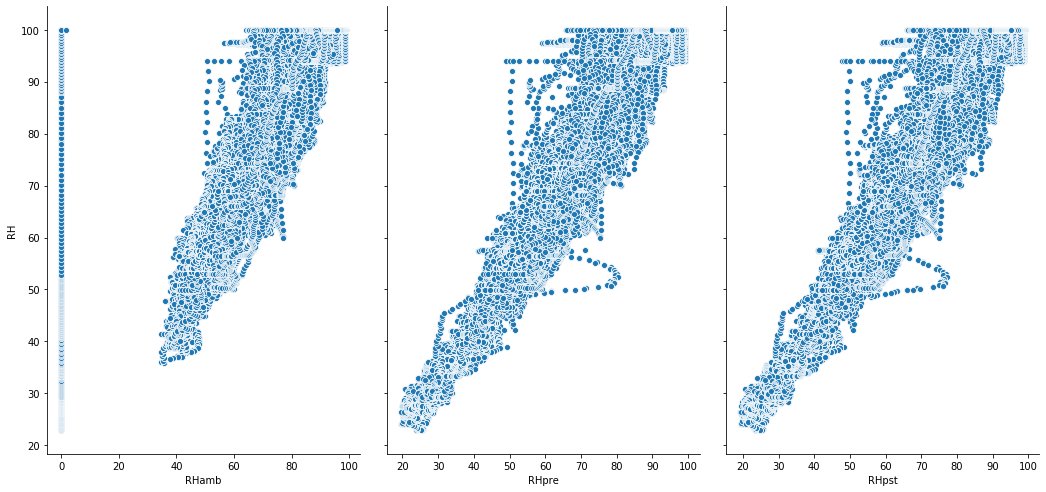

In [68]:
sns.pairplot(dfa4, x_vars=['RHamb','RHpre','RHpst'], y_vars='RH', height=7, aspect=0.7)

Based on this visualization of the three Rh sensors on the duct in comparison to the Boone Weather station I am going to drop the RH amb sensor due to the error the sensor had with RH less than 40. I will also drop the post filter sensor as it appears to accurately mimic the prefilter sensor. I will then fit a linear relationship between the weather station and the prefilter sensor to fill in the missing months of data. The correlation test ran below on all of the data also support droping the anmbient and post filter RH variables. Escpecially as the correlation between the pre and post filter locations is equal to 1 suggesting that the two are identical variables.


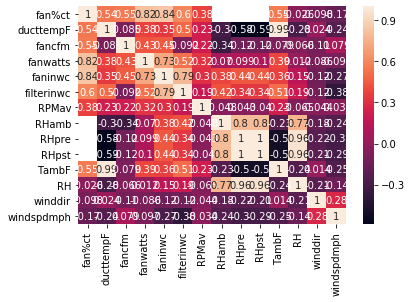

In [142]:
corr = dfa4.corr(method = "pearson")
sns.heatmap(corr, annot = True)
plt.savefig('Correlation heatmap.png', tight_layout= True)

In [143]:
corr

,fan%ct,ducttempF,fancfm,fanwatts,faninwc,filterinwc,RPMav,RHamb,RHpre,RHpst,TambF,RH,winddir,windspdmph
fan%ct,1.000000,0.542491,0.554330,0.823279,0.840774,0.599533,0.376053,NaN,NaN,NaN,0.553788,-0.026263,-0.097896,-0.165163
ducttempF,0.542491,1.000000,-0.085128,0.378646,0.347595,0.502429,0.225834,-0.298167,-0.583209,-0.586664,0.991585,-0.278254,0.023901,-0.235056
fancfm,0.554330,-0.085128,1.000000,0.432117,0.451163,-0.092345,0.220795,-0.337037,-0.118324,-0.117661,-0.078503,-0.065995,-0.107333,0.079384
fanwatts,0.823279,0.378646,0.432117,1.000000,0.727285,0.524054,0.319696,0.070227,0.099284,0.100236,0.388294,0.012074,-0.085951,-0.096943
faninwc,0.840774,0.347595,0.451163,0.727285,1.000000,0.794932,0.300706,0.382408,0.442687,0.444863,0.363695,0.145316,-0.124995,-0.272048
filterinwc,0.599533,0.502429,-0.092345,0.524054,0.794932,1.000000,0.189517,0.424224,0.336710,0.338019,0.514784,0.194287,-0.115778,-0.377730
RPMav,0.376053,0.225834,0.220795,0.319696,0.300706,0.189517,1.000000,-0.048221,-0.042959,-0.040121,0.227063,-0.064563,-0.043629,-0.034188
RHamb,NaN,-0.298167,-0.337037,0.070227,0.382408,0.424224,-0.048221,1.000000,0.800640,0.798951,-0.232789,0.772527,-0.175780,-0.238760
RHpre,NaN,-0.583209,-0.118324,0.099284,0.442687,0.336710,-0.042959,0.800640,1.000000,0.999018,-0.498539,0.961729,-0.215006,-0.296778
RHpst,NaN,-0.586664,-0.117661,0.100236,0.444863,0.338019,-0.040121,0.798951,0.999018,1.000000,-0.502964,0.961726,-0.213721,-0.294932


In [69]:
# drop the two columns out
dfa5=dfa4.drop(['RHamb','RHpst'], axis = 1)
dfa5.head()

,fan%ct,ducttempF,fancfm,fanwatts,faninwc,filterinwc,RPMav,RHpre,TambF,RH,winddir,windspdmph
Date_Time,,,,,,,,,,,,
2019-03-25 13:00:00,78,39.20,2678.794006,179.9964,0.373734,0.172802,1281.5,NaN,37.85,100.0,70.0,5.75
2019-03-25 13:01:00,78,39.20,2644.450493,179.9964,0.373734,0.172802,1283.5,NaN,37.94,100.0,72.0,5.75
2019-03-25 13:02:00,79,39.20,2644.450493,179.9964,0.377753,0.172802,1285.0,NaN,38.03,100.0,74.0,5.75
2019-03-25 13:03:00,79,39.38,2747.481031,239.9952,0.381771,0.176820,1289.0,NaN,38.12,100.0,76.0,5.75
2019-03-25 13:04:00,80,39.38,2678.794006,179.9964,0.377753,0.176820,1291.5,NaN,38.21,100.0,78.0,5.75


In [114]:
rhcal = dfa5.copy()
from sklearn.linear_model import LinearRegression
x_data=rhcal['RH']
x_dataa=x_data[150000:296458]
x_data1=x_dataa.to_numpy()
y_data=rhcal['RHpre']
y_dataa=y_data[150000:296458]
y_dataa=y_dataa.fillna(y_dataa.mean())
print(y_dataa.describe())
y_data1=y_dataa.to_numpy()
x_data.shape
x_data1=x_data1.reshape(-1,1)
y_data1=y_data1.reshape(-1,1)
x_data1.shape
y_data1.shape


count    146458.000000
mean         80.142670
std          14.545092
min          35.634000
25%          69.702000
50%          85.287000
75%          92.041000
max          99.184000
Name: RHpre, dtype: float64


(146458, 1)

In [119]:
model = LinearRegression()
model.fit(x_data1, y_data1)
print(model.intercept_,model.coef_)

[4.10875729] [[0.88050818]]


In [120]:
print(model.score(x_data1,y_data1))

0.9160806108351478


In [121]:
#dfa5 is the current correct df with all data
#use the linear regession just developed
fill_value = dfa5['RH']*0.88050818+4.10875729
dfa5['RHpre']=dfa5['RHpre'].fillna(fill_value)
dfa5.head()

,fan%ct,ducttempF,fancfm,fanwatts,faninwc,filterinwc,RPMav,RHpre,TambF,RH,winddir,windspdmph
Date_Time,,,,,,,,,,,,
2019-03-25 13:00:00,78,39.20,2678.794006,179.9964,0.373734,0.172802,1281.5,92.159575,37.85,100.0,70.0,5.75
2019-03-25 13:01:00,78,39.20,2644.450493,179.9964,0.373734,0.172802,1283.5,92.159575,37.94,100.0,72.0,5.75
2019-03-25 13:02:00,79,39.20,2644.450493,179.9964,0.377753,0.172802,1285.0,92.159575,38.03,100.0,74.0,5.75
2019-03-25 13:03:00,79,39.38,2747.481031,239.9952,0.381771,0.176820,1289.0,92.159575,38.12,100.0,76.0,5.75
2019-03-25 13:04:00,80,39.38,2678.794006,179.9964,0.377753,0.176820,1291.5,92.159575,38.21,100.0,78.0,5.75


In [122]:
#output the final data frame.
dfa5.to_csv('finaldata.csv')

Data Exploartion- Two pariwise plots were generated. One targeted on the inputs that were considered the most important and the second to visualize all variables in the data frame. It was decided to drop the weather station temperature and RH based on the high correlation value with the local duct sensors. 

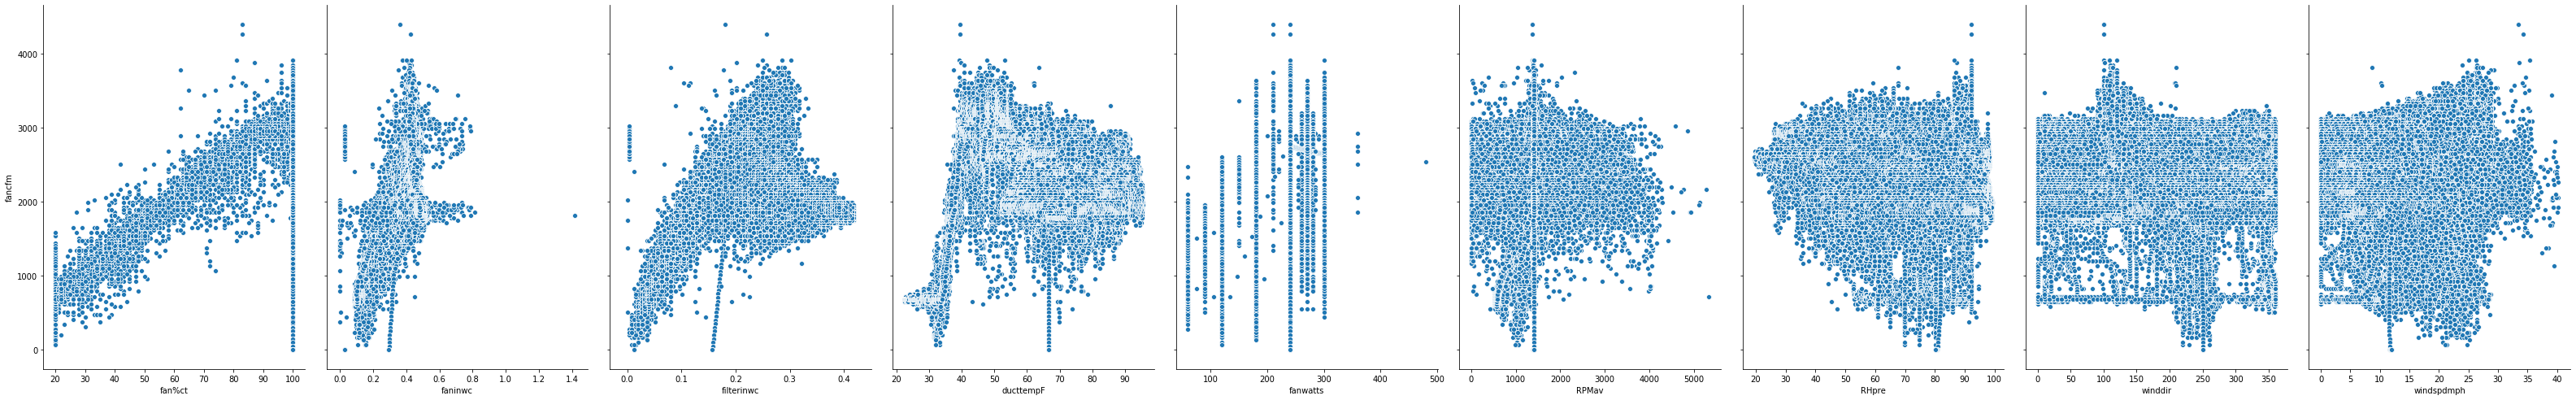

In [125]:
sns.pairplot(dfa5, x_vars=['fan%ct','faninwc','filterinwc','ducttempF','fanwatts','RPMav','RHpre','winddir','windspdmph'], y_vars='fancfm', height=7, aspect=0.7)

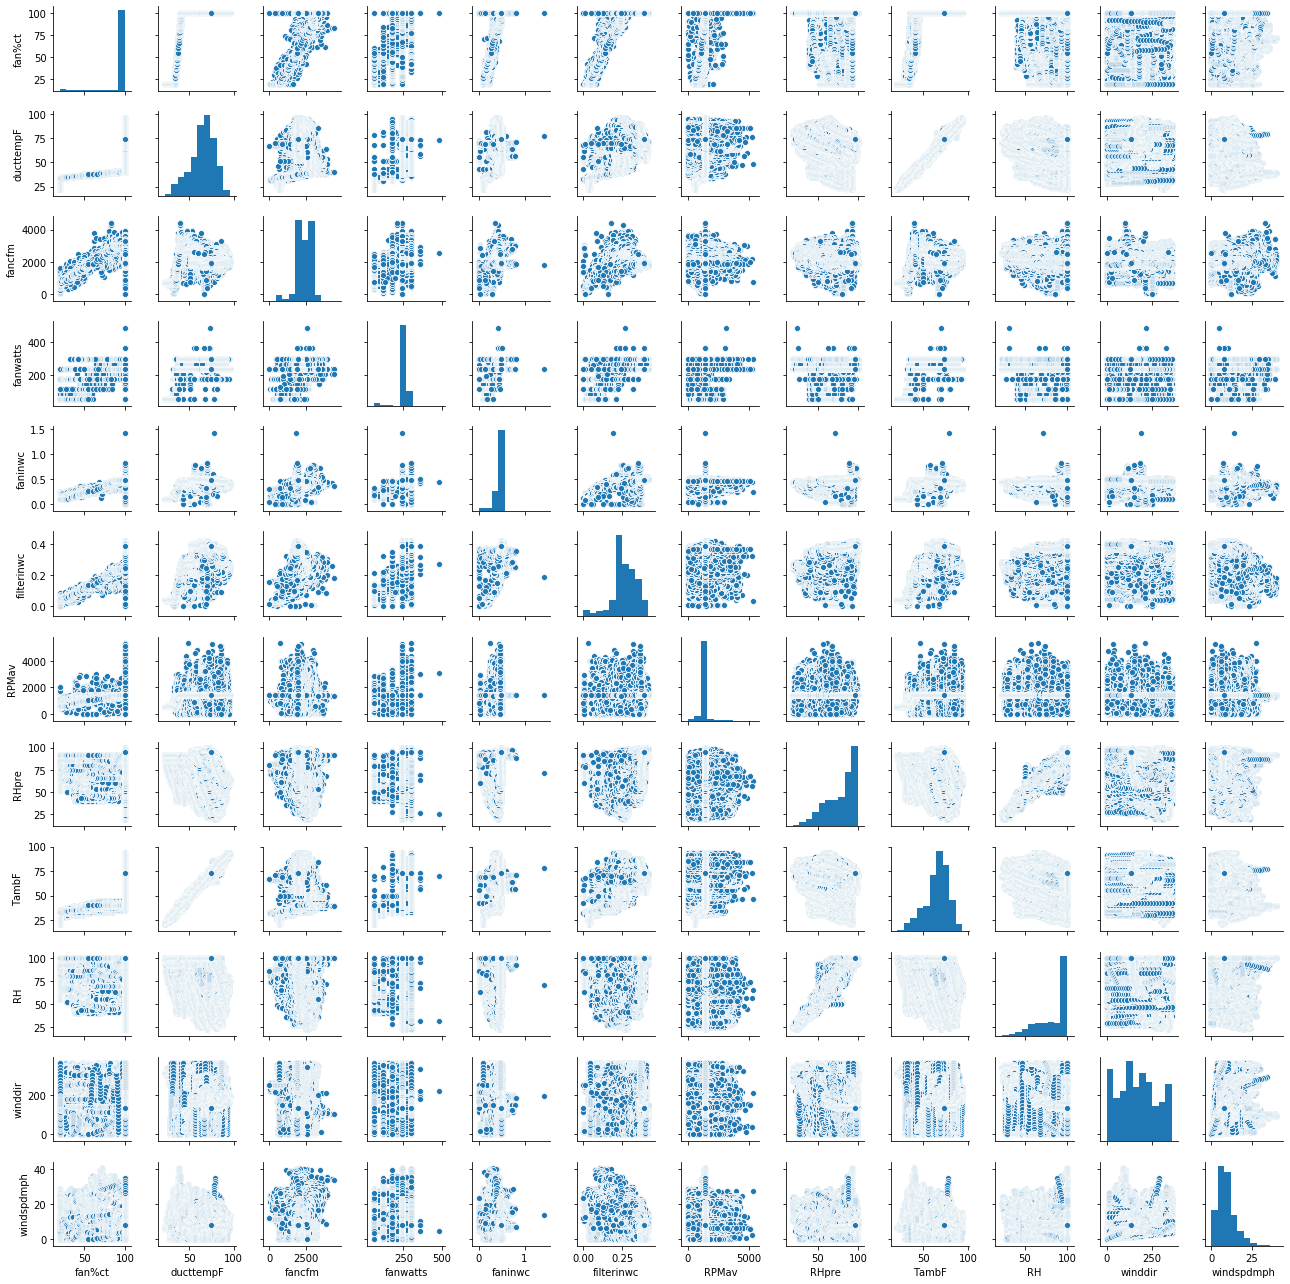

In [126]:
sns.pairplot(dfa5, height=1.5)

Model Development- The code following is the training and evaluation of the two propsed models. The first step will be spliting the data into train and test sets. From this split the unique inputs will be adjusted for the second model so that both models are trained with the same set of inputs.

In [128]:
#Set the y variable
y_dt=dfa5['fancfm']
#Set the overall set of inputs that will be fed into the first model
x_dt=dfa5.drop(['fancfm','RH','TambF'], axis=1)
y_dt.shape

(296458,)

In [129]:
x_dt.shape

(296458, 9)

In [130]:
#Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_dt,y_dt, test_size= 0.25, random_state = 0)
print(X_train.shape, Y_train.shape)

(222343, 9) (222343,)


In [132]:
#iniate the full model
import sklearn.ensemble as ske
reg = ske.RandomForestRegressor(n_estimators = 1000, random_state = 0)

In [133]:
#train the full model
reg.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [134]:
#evaluation parameters from sklearn metrics
y_pred = reg.predict(X_test)
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error, mean_squared_error, r2_score
print("Expalained Variance", explained_variance_score(Y_test, y_pred))
print("Max error", max_error(Y_test, y_pred))
print("Mean absolute error", mean_absolute_error(Y_test, y_pred))
print("Mean squared error", mean_squared_error(Y_test, y_pred))
print("r2", r2_score(Y_test, y_pred, multioutput = 'variance_weighted')) 

Expalained Variance 0.9824599387161097
Max error 1274.3503891010027
Mean absolute error 36.12524370419231
Mean squared error 4281.300513917764
r2 0.9824589456280732


In [153]:
import math
print("RMSE", math.sqrt(mean_squared_error(Y_test,y_pred)))
print("Error per filter", (math.sqrt(mean_squared_error(Y_test,y_pred)))/4)

RMSE 65.43164764789103
Error per filter 16.357911911972757


In [135]:
#code to output the model for future work
from sklearn.externals import joblib

C:\Users\bcsmith1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [136]:
filename = 'allparforestmodel.sav'
joblib.dump(reg, filename)

['allparforestmodel.sav']

In [137]:
#code to load model in the future
#loaded_model = joblib.load(filename)
#result = loaded_model.score(X_test, Y_test)
#print(result)

In [138]:
dfa5.describe()

,fan%ct,ducttempF,fancfm,fanwatts,faninwc,filterinwc,RPMav,RHpre,TambF,RH,winddir,windspdmph
count,296458.000000,296458.000000,296458.000000,296458.000000,296458.000000,296458.000000,296458.000000,296458.000000,296458.000000,296458.000000,296458.000000,296458.000000
mean,96.701674,65.024005,2365.960791,243.852364,0.427560,0.267454,1400.027586,77.524726,64.582756,83.533935,169.685251,9.025324
std,14.335937,13.367347,493.472457,41.425912,0.070157,0.075236,349.382198,16.908661,12.894917,18.735340,103.140461,5.604261
min,20.000000,22.640000,0.000000,59.998800,0.000000,0.000000,1.000000,19.545000,21.200000,22.860000,0.000000,0.000000
25%,100.000000,57.560000,2060.610774,239.995200,0.425977,0.229063,1406.000000,65.075500,57.200000,69.801000,90.000000,5.520000
50%,100.000000,66.560000,2335.358877,239.995200,0.442051,0.265231,1406.500000,83.984000,66.200000,93.129500,163.000000,8.050000
75%,100.000000,74.300000,2816.168057,239.995200,0.458126,0.325510,1407.000000,92.159575,73.400000,100.000000,247.000000,11.672500
max,100.000000,95.360000,4395.969650,479.990400,1.414564,0.417939,5337.000000,99.184000,93.200000,100.000000,360.000000,40.250000


In [139]:
#Output the model for visualiztion. Attemped to build a graphic but the tree is far to big for it to handle easily.
from sklearn import tree
tree.export_graphviz(reg.estimators_[0], 'tree.dot')

In [141]:
tree.export_graphviz(reg.estimators_[5], 'tree.dot', feature_names = x_dt.columns,rounded = True, precision = 1)

In [146]:
#drop the two variables of interest to start building the next model
X_train.head()
X_train1 = X_train.drop(['fan%ct','RPMav'], axis=1)
X_train1.head()

,ducttempF,fanwatts,faninwc,filterinwc,RHpre,winddir,windspdmph
Date_Time,,,,,,,
2019-04-03 09:33:00,44.24,239.9952,0.462144,0.217007,75.594575,170.0,8.3950
2019-08-24 08:44:00,60.80,239.9952,0.478219,0.361678,86.597000,125.5,12.0175
2019-03-29 03:30:00,35.96,119.9976,0.196914,0.096448,92.159575,350.0,13.2250
2019-09-02 19:42:00,75.74,239.9952,0.470182,0.369715,81.465000,150.0,8.0500
2019-06-13 08:31:00,60.44,239.9952,0.450088,0.277287,58.108000,340.0,5.9800


In [147]:
X_train.shape

(222343, 9)

In [148]:
#Iniate the second model
reg1 = ske.RandomForestRegressor(n_estimators = 1000, random_state = 0)

In [149]:
#Train the second model
reg1.fit(X_train1, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [150]:
#output the second model
filename = 'selectforestmodel.sav'
joblib.dump(reg1, filename)

['selectforestmodel.sav']

In [151]:
#Output for visualization
tree.export_graphviz(reg.estimators_[5], 'treeselect.dot', feature_names = x_dt.columns,rounded = True, precision = 1)

In [155]:
X_test1 = X_test.drop(['fan%ct','RPMav'], axis=1)
X_test1.head()

,ducttempF,fanwatts,faninwc,filterinwc,RHpre,winddir,windspdmph
Date_Time,,,,,,,
2019-07-14 13:30:00,89.42,239.9952,0.438032,0.285324,55.816000,187.5,6.3250
2019-04-12 04:04:00,32.72,119.9976,0.140653,0.032149,74.743123,224.5,20.7000
2019-05-26 13:53:00,76.64,239.9952,0.405883,0.217007,48.046115,73.5,5.5200
2019-05-31 00:54:00,63.68,299.9940,0.446070,0.233081,92.159575,330.0,5.8075
2019-03-28 20:14:00,44.24,239.9952,0.438032,0.208970,70.744296,10.0,13.9150


In [157]:
#Generate predicted values for evaluation
y_pred1 = reg1.predict(X_test1)

In [158]:
#calculate and print the evalaution values
print("Expalained Variance", explained_variance_score(Y_test, y_pred1))
print("Max error", max_error(Y_test, y_pred1))
print("Mean absolute error", mean_absolute_error(Y_test, y_pred1))
print("Mean squared error", mean_squared_error(Y_test, y_pred1))
print("r2", r2_score(Y_test, y_pred1, multioutput = 'variance_weighted')) 
print("RMSE", math.sqrt(mean_squared_error(Y_test,y_pred1)))
print("Error per filter", (math.sqrt(mean_squared_error(Y_test,y_pred1)))/4)

Expalained Variance 0.9821619271045593
Max error 1319.099986388007
Mean absolute error 36.428353639752586
Mean squared error 4354.101404213069
r2 0.9821606707532209
RMSE 65.98561513097434
Error per filter 16.496403782743585


The code below is outputing the variables based on their feature importances. At the end two graphics are generated to visualize the importance for each model.

In [159]:
reg.feature_importances_

array([0.31153321, 0.03436532, 0.00117237, 0.13767605, 0.44641786,
       0.0033098 , 0.01355807, 0.02567053, 0.02629679])

In [160]:
reg.feature_importances_[np.argsort(reg.feature_importances_)]

array([0.00117237, 0.0033098 , 0.01355807, 0.02567053, 0.02629679,
       0.03436532, 0.13767605, 0.31153321, 0.44641786])

In [161]:
fet_ind = np.argsort(reg.feature_importances_)[::-1]

In [162]:
fet_imp=reg.feature_importances_[np.argsort(reg.feature_importances_)][::-1]

In [163]:
X_train.columns[fet_ind]

Index(['filterinwc', 'fan%ct', 'faninwc', 'ducttempF', 'windspdmph', 'winddir',
       'RHpre', 'RPMav', 'fanwatts'],
      dtype='object')

Text(0.5, 1.0, 'Feature importance Model with all')

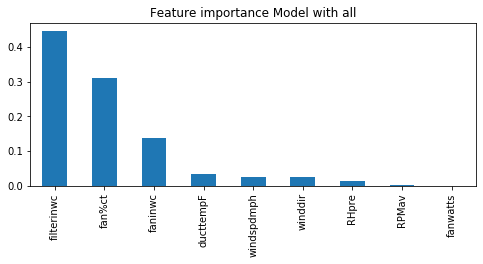

In [164]:
fig, ax = plt.subplots(1,1, figsize =(8,3))
labels = X_train.columns[fet_ind]
pd.Series(fet_imp, index = labels).plot('bar', ax=ax)
ax.set_title('Feature importance Model with all')

In [165]:
reg1.feature_importances_

array([0.34556098, 0.00132736, 0.13834946, 0.44723094, 0.01424377,
       0.02626334, 0.02702416])

Text(0.5, 1.0, 'Feature importance Model with selected values')

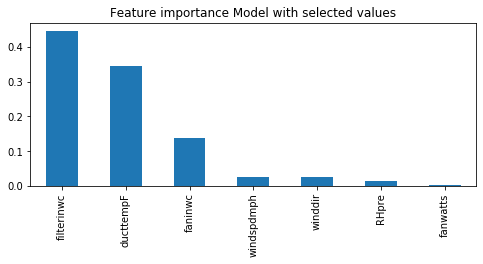

In [166]:
reg1.feature_importances_[np.argsort(reg1.feature_importances_)]
fet_ind = np.argsort(reg1.feature_importances_)[::-1]
fet_imp=reg1.feature_importances_[np.argsort(reg1.feature_importances_)][::-1]
X_train1.columns[fet_ind]
fig, ax = plt.subplots(1,1, figsize =(8,3))
labels = X_train1.columns[fet_ind]
pd.Series(fet_imp, index = labels).plot('bar', ax=ax)
ax.set_title('Feature importance Model with selected values')